# MNIS CNN
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u a needed link

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.
c:\users\aditya\miniconda3\envs\py36\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
 
from keras.models import Model

In [3]:
np.random.seed(42)

In [4]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 


In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

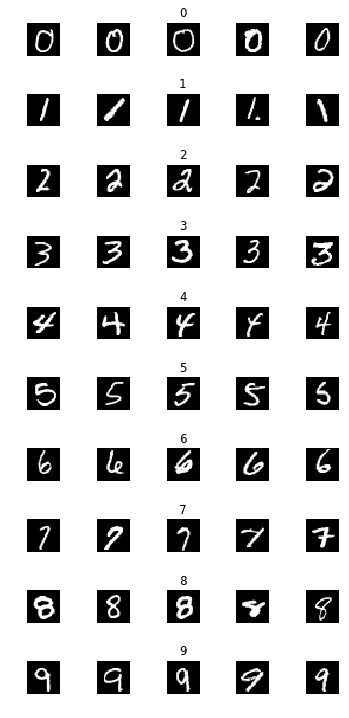

In [7]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


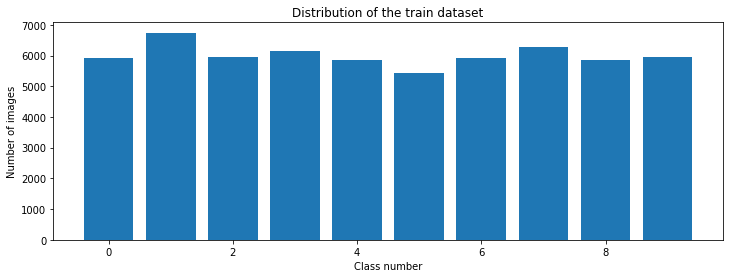

In [8]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 

In [9]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [11]:
# define the larger model
def leNet_model():
  # create model
  model = Sequential()
  # no need for padding as MNIST images are centered  
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(155, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [12]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 155)               58280     
_________________________________________________________________
dropout_1 (Dropout)          (None, 155)               0         
__________

In [13]:
history = model.fit(X_train, y_train, epochs = 10, validation_split=0.1, batch_size=400, verbose = 1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 40s 736us/step - loss: 0.2490 - acc: 0.9220 - val_loss: 0.0609 - val_acc: 0.9820
Epoch 2/10
54000/54000 [==============================] - 41s 755us/step - loss: 0.0838 - acc: 0.9754 - val_loss: 0.0401 - val_acc: 0.9880
Epoch 3/10
54000/54000 [==============================] - 40s 749us/step - loss: 0.0660 - acc: 0.9806 - val_loss: 0.0433 - val_acc: 0.9872
Epoch 4/10
54000/54000 [==============================] - 40s 746us/step - loss: 0.0601 - acc: 0.9820 - val_loss: 0.0343 - val_acc: 0.9908
Epoch 5/10
54000/54000 [==============================] - 40s 743us/step - loss: 0.0563 - acc: 0.9830 - val_loss: 0.0454 - val_acc: 0.9877
Epoch 6/10
54000/54000 [==============================] - 40s 738us/step - loss: 0.0512 - acc: 0.9841 - val_loss: 0.0419 - val_acc: 0.9895
Epoch 7/10
54000/54000 [==============================] - 40s 736us/step - loss: 0.0528 - acc: 0.9836 - val_loss: 0.0

Text(0.5,0,'epoch')

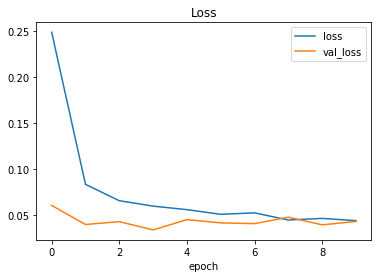

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

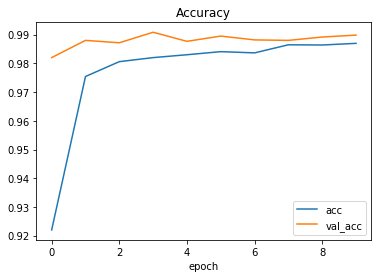

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.030624765569197188
Test accuracy: 0.9895


(1, 28, 28, 1)
(1, 28, 28, 1)
predicted digit: [3]


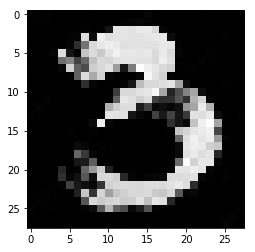

In [17]:
#predict internet number
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
 
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)
 
print(img.shape)
print("predicted digit: "+str(model.predict_classes(img)))

(1, 24, 24, 30)
(1, 10, 10, 15)


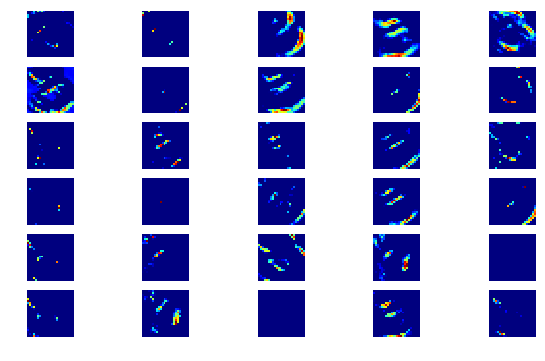

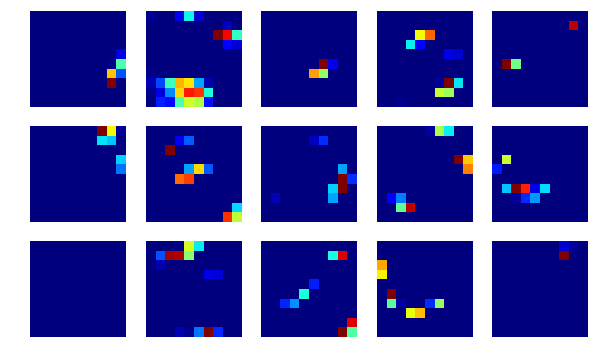

In [18]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
 
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
 
print(visual_layer1.shape)
print(visual_layer2.shape)
 
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
 
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')